In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Experiment**

To compute experimental results we run the experiment multiple times for various values of `n` and `N`. Observe that `n is in [1000, 10000]` and that `N is in [1n ... 64n]`. For each unique `(n, N)` combination the experiment will be repeated 10 times. Each repitition has a unique seed.

In [63]:
def unique_values_experiment(n, N, z):
    np.random.seed(n*N*z)
    random_values = np.random.randint(0, N*n, n)
    experiment = len(np.unique(random_values))
    return experiment

In [64]:
r_exp = []
n = np.array([1000, 10000])
N = np.array([x for x in range(1, 65)])
for x in n:
    r_n = []
    for y in N:
        for z in range(10):
            num_unique = unique_values_experiment(x, y, z)
            r_n.append(num_unique)
    r_exp.append(r_n)   

The results of the experiment can be plotted into the following graphs.

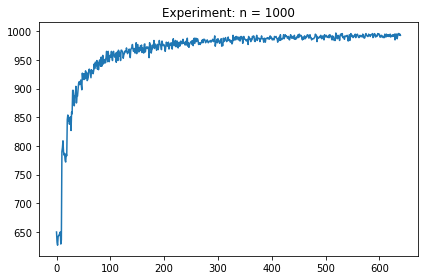

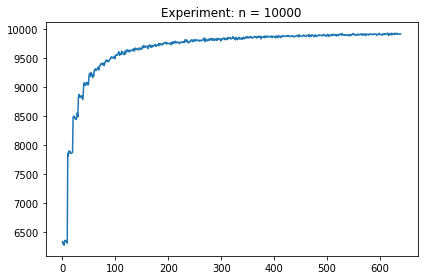

In [65]:
plt.title('Experiment: n = 1000')
plt.plot(r_exp[0])
plt.tight_layout()
plt.show()

plt.title('Experiment: n = 10000')
plt.plot(r_exp[1])
plt.tight_layout()
plt.show()

## **Our Formula**

We can generalize the experimental results into the following formula:
```
unique_values(n,N) = n - (n - N(1 - ((N-1)/N)^n))
```

In [66]:
def unique_values(n, N):
    prediction = n - (n - N*(1 - ((N-1)/N)**n))
    return prediction

In [67]:
r_pred = []
for x in n:
    r_n = []
    for y in N:
        for z in range(10):
            num_unique = unique_values(x, y*x)
            r_n.append(num_unique)
    r_pred.append(r_n)

This formula results in the following graphs.

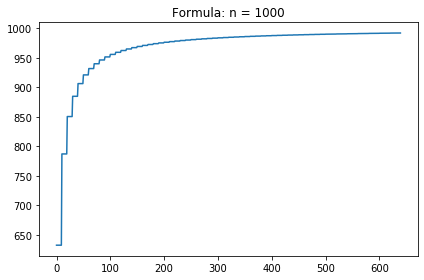

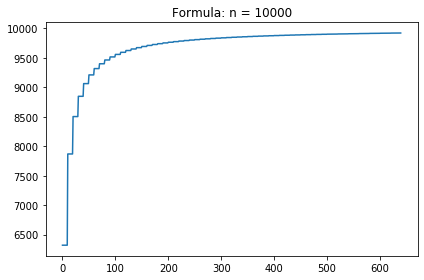

In [68]:
plt.plot(r_pred[0])
plt.title('Formula: n = 1000')
plt.tight_layout()
plt.show()

plt.plot(r_pred[1])
plt.title('Formula: n = 10000')
plt.tight_layout()
plt.show()

## **Comparison**

We can then plot the graphs together to see how the formula aligns to the actual results.

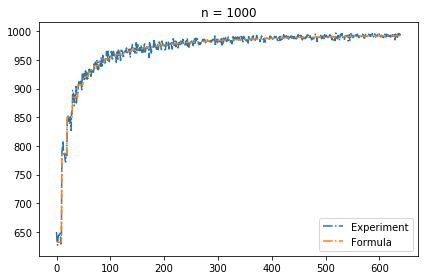

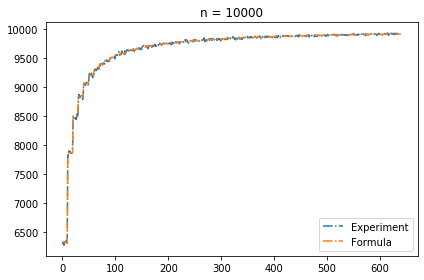

In [69]:
plt.title('n = 1000')
plt.plot(r_exp[0],'-.',label="Experiment")
plt.plot(r_pred[0],'-.',label="Formula")
plt.legend()
plt.tight_layout()
plt.show()

plt.title('n = 10000')
plt.plot(r_exp[1],'-.',label="Experiment")
plt.plot(r_pred[1],'-.',label="Formula")
plt.legend()
plt.tight_layout()
plt.show()